**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_r_kernel_tidyverse:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_r_kernel_tidyverse:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/r_kernel_tidyverse).

---

Nota generada a partir de [liga](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0) 

En esta nota revisamos a los **mínimos cuadrados lineales con y sin regularización**. La **regularización** que utilizamos es la de **[Tikhonov](https://en.wikipedia.org/wiki/Tikhonov_regularization)** también nombrada $\ell_2$ o ***ridge*** y la $\ell_1$ o también conocida como **[*lasso*](https://en.wikipedia.org/wiki/Lasso_(statistics)** (*least absolute shrinkage and selection operator*, Tibshirani, 1996). Se muestra el uso de **métodos de descenso** (ver [4.2.Algoritmos_para_UCO](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Algoritmos_para_UCO.ipynb)) para resolver los problemas de optimización que surgen en los modelos anteriores y **no se tiene por objetivo la interpretación de los coeficientes estimados**. Se comparan los resultados del paquete [glmnet stanford](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html), [glmnet cran](https://cran.r-project.org/web/packages/glmnet/index.html) de R con los obtenidos en la implementación hecha por el prof en [algoritmos/R](algoritmos/R), en específico [algoritmos/R/algorithms_for_uco.R](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/algoritmos/R/algorithms_for_uco.R) para problemas tipo UCO (Unconstrained Convex Optimization). 

# Mínimos cuadrados

Obsérvese que hay una gran cantidad de modelos por mínimos cuadrados, por ejemplo:

* [Lineales](https://en.wikipedia.org/wiki/Linear_least_squares) u [ordinarios](https://en.wikipedia.org/wiki/Ordinary_least_squares) (nombre más usado en Estadística y Econometría).

* [Generalizados](https://en.wikipedia.org/wiki/Generalized_least_squares), [ponderados](https://en.wikipedia.org/wiki/Weighted_least_squares).

* [No lineales](https://en.wikipedia.org/wiki/Non-linear_least_squares).

* [Totales](https://en.wikipedia.org/wiki/Total_least_squares) y [parciales](https://en.wikipedia.org/wiki/Partial_least_squares_regression).

* [No negativos](https://en.wikipedia.org/wiki/Non-negative_least_squares).

* [Rango reducido](https://epubs.siam.org/doi/abs/10.1137/1.9780898718867.ch7).


# Mínimos cuadrados lineales

Cada uno de los modelos anteriores tienen diversas aplicaciones y propósitos. Los lineales son un caso particular del problema más general de **aproximación por normas**:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||$$

donde: $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$ son datos del problema, $x \in \mathbb{R}^n$ es la variable de optimización y $|| \cdot||$ es una norma en $\mathbb{R}^m$. 

**Se asume en toda la nota que $m \geq n $ (más renglones que columnas en $A$)**.

$x^* = \text{argmin}_{x \in \mathbb{R}^n} ||Ax-b||$ se le nombra **solución aproximada** de $Ax \approx b$ en la norma $|| \cdot ||$. El vector: $r(x) = Ax -b$ se le nombra **residual** del problema.

**Comentario:** el problema de aproximación por normas también se le nombra **problema de regresión**. En este contexto, los vectores $a_1, a_2, \dots, a_n$ (columnas de $A$) son nombradas regresoras o vector de atributos y el vector $\displaystyle \sum_{j=1}^n x_j^*a_j$ con $x^*$ óptimo del problema es nombrado la **regresión de $b$ sobre las regresoras**. $b$ es la **respuesta.**


Si en el problema de aproximación de normas anterior se utiliza la norma Euclidiana o norma $2$, $|| \cdot ||_2$, y se eleva al cuadrado la función objetivo se tiene:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||^2_2$$

que es el modelo por mínimos cuadrados lineales cuyo objetivo es minimizar la suma de cuadrados de las componentes del residual $r(x)$.


**A partir de aquí, la variable de optimización será $\beta$ y no $x$**:

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima. Por ejemplo:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de **mínimos cuadrados lineales** se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/a6pjx0pdqa3cp60/mc_beta.png?dl=0" heigth="400" width="400">


donde: $r(\beta) = y-A\beta$, el vector $y \in \mathbb{R}^m$ contiene las entradas $y_i$'s y la matriz $A \in \mathbb{R}^{m \times n}$ contiene a las entradas $x_i$'s o funciones de éstas $\forall i=0,1,\dots,m$.. Por el dibujo se tiene que cumplir que $A^Tr(\beta)=0$, esto es: las columnas de $A$ son ortogonales a $r(\beta)$. La condición anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(\beta)=A^T(y-A\beta)=A^Ty-A^TA\beta.$$

Finalmente, considerando la variable de optimización $\beta$ y al vector $y$ tenemos: $A^TA \beta = A^Ty$.

* En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste. Con las funciones $\phi_j (\cdot)$ se construye a la matriz $A$.

* La función objetivo en los mínimos cuadrados lineales puede escribirse de las siguientes formas:

$$f_o(\beta)=\displaystyle \sum_{i=1}^{20} (y_i -f_o(x_i|\beta))^2 = \displaystyle \sum_{i=1}^{20} (y_i - A[i,:]^T\beta)^2 = ||y - A \beta||_2^2= (y-A\beta)^T(y-A\beta) = y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta$$

con $A[i,:]$ $i$-ésimo renglón de $A$ visto como un vector en $\mathbb{R}^n$. Es común dividir por $2$ la función objetivo para finalmente tener el problema:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta.$$

En cualquier reescritura de la función $f_o$, el problema de aproximación con normas, o bien en su caso particular de mínimos cuadrados, es un problema de **optimización convexa** (ver [4.1.Optimizacion_numerica_y_machine_learning](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.1.Optimizacion_numerica_y_machine_learning.ipynb)).

## Regularización

En lo que sigue se utiliza una nomenclatura similar del paquete [glmnet](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html) de R.

Una técnica muy utilizada en el contexto de *machine learning* es la regularización, la cual tiene diferentes efectos en la solución de los problemas que surgen en esta área (por ejemplo lidiar con multicolinealidad entre variables, ver [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity), o el sobre ajuste, ver [Overfitting](https://en.wikipedia.org/wiki/Overfitting)) . La regularización es un **caso particular** del problema más general de **optimización multicriterio, multiobjetivo, vectorial o también nombrada Pareto**, ver [Multi objective optimization](https://en.wikipedia.org/wiki/Multi-objective_optimization). 

Al añadir regularización al problema de aproximación por normas, se obtiene un problema de optimización *bi criterion* en el que además de minimizar la norma $||A\beta-y||$, se tiene que encontrar $\beta \in \mathbb{R}^n$ con norma $||\cdot||$ lo más pequeña posible. Esto es, se debe resolver el siguiente problema de **optimización convexa** con dos objetivos $||A\beta-y||$, $||\beta||$:

$$\displaystyle \min (||A\beta-y||,||\beta||)$$

respecto a $\mathbb{R}^2_+ = \{(u,v) \in \mathbb{R}^2 : u \geq 0, v \geq 0\}$.

**Comentario:** en este problema se tiene el *tradeoff* entre tener $||\beta||$ mínima y $||A\beta-y||$ "grande" o mínima $||A\beta-y||$ y $||\beta||$ "grande".

La regularización es una técnica para resolver el problema anterior pues se propone una función objetivo como una **suma ponderada** de los dos objetivos anteriores:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y|| + \lambda ||\beta||$$

donde: $\lambda > 0 $ es un **parámetro** del problema. En esta formulación $\lambda$ varía en $(0, \infty)$ y permite realizar el *tradeoff* en el tamaño entre $||A\beta-y||$ vs $||\beta||$ descrito anteriormente.


Entre las elecciones de norma más populares para el problema de regresión con regularización están:

* La norma $2$ o $\ell_2$ o Euclidiana que da lugar a la regularización [Tikhonov](https://en.wikipedia.org/wiki/Tikhonov_regularization) o *ridge*: 

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2 + \lambda ||\beta||_2^2 = \beta^T(A^TA + \lambda I )\beta - 2\beta^TAy + y^Ty$$

donde: $I$ es la matriz identidad. Este problema **siempre** tiene solución (aún si $A$ es de $rank$ incompleto) pues $A^TA + \lambda I$ es una matriz definida positiva para $\lambda >0$. La solución está dada por: $\beta^* = (A^TA + \lambda I)^{-1}A^Ty$.

* La norma $1$ o $\ell_1$ o del [taxi](https://en.wikipedia.org/wiki/Taxicab_geometry) que produce la regularización conocida como **[*lasso*](https://en.wikipedia.org/wiki/Lasso_(statistics)** (*least absolute shrinkage and selection operator*, Tibshirani, 1996):

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2 + \lambda ||\beta||_1$$

**Comentario:** es posible probar que los problemas anteriores son equivalentes a:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2$$



$$\text{sujeto a: } ||\beta||^2_2 \leq t$$

para el caso de *ridge* y:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2$$

$$\text{sujeto a: } ||\beta||_1 \leq t.$$

para el caso de *lasso* y con $t$ un parámetro que define la regularización y está relacionado con $\lambda$. Las formulaciones anteriores ayudan a visualizar lo que en el proceso de optimización se está buscando:

<img src="https://dl.dropboxusercontent.com/s/lw3h8aw21yr2qhp/lasso-ridge-regularization.png?dl=0" heigth="500" width="500">


en el dibujo anterior las curvas de nivel de la función objetivo (convexa) se representan como elipses y la variable de optimización es $\beta \in \mathbb{R}^2$. Del lado izquierdo tenemos la bola unitaria bajo la norma $1$ que corresponde a la regularización *lasso* y del lado derecho la bola unitaria bajo la norma $2$ que corresponde a la regularización *ridge*. En ambos dibujos se observa que la solución está dada por $\beta^*$ y que resulta de la intersección de la curva de nivel que toca a la bola unitaria respectiva.

* [*Elastic net*](https://www.rdocumentation.org/packages/glmnet/versions/3.0-2/topics/glmnet):

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2 + \lambda ((1-\alpha)||\beta||^2_2 + \alpha ||\beta||_1)$$

para valores $\alpha \in [0,1]$. Obsérvese si $\alpha = 0$ se tiene la regularización *ridge* y si $\alpha=1$ se tiene la regularización *lasso*. Este tipo de regularización realiza un equilibrio entre ambas regularizaciones.

## Ejemplo sin regularización vía descenso en gradiente

In [1]:
install.packages(c("latex2exp","glmnet"),lib="/usr/local/lib/R/site-library/",
                repos="https://cran.itam.mx/")

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




**En este primer ejemplo no usamos regularización, es un problema de mínimos cuadrados lineales.**

In [2]:
#load numerical differentiation
#load utils
#load algorithms for unconstrained convex optimization
#load line search
dir_R="algoritmos/R"
source(paste(dir_R,"/numerical_differentiation.R", 
             sep=""))
source(paste(dir_R,"/utils.R", 
             sep=""))
source(paste(dir_R,"/algorithms_for_uco.R", 
             sep=""))
source(paste(dir_R,"/line_search.R",
             sep=""))

In [3]:
library(ggplot2)
library(latex2exp)
library(glmnet)
library(magrittr)
library(dplyr)

Loading required package: Matrix

Loaded glmnet 3.0-2



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Generamos puntos pseudo aleatorios:

In [4]:
set.seed(1989) #para reproducibilidad
mpoints <- 20
df <-  data.frame(x=rnorm(mpoints))
y <- -3*df$x + rnorm(mpoints,2,1)
df$y <- y

In [5]:
gg <- ggplot(data=df, aes(x=x, y=y))

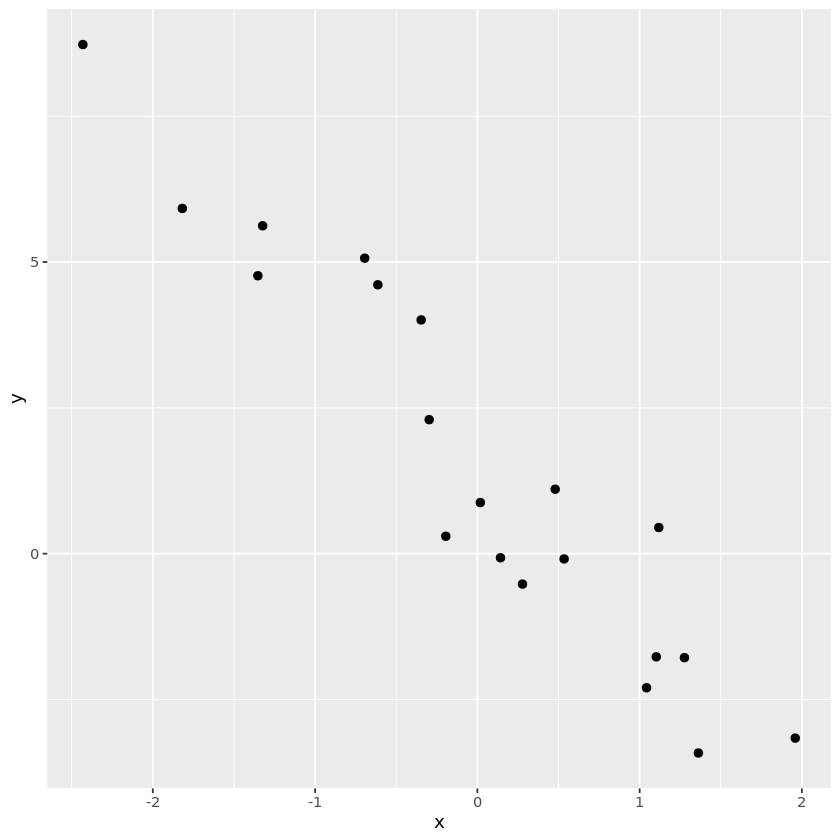

In [6]:
gg + 
geom_point(aes(x=x,y=y),size=2)

Usamos la función [lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm) del paquete `stats` de R para ajustar un modelo de regresión lineal:

In [7]:
linear_model <- lm(df$y~df$x)

In [8]:
print(linear_model$coefficients)

(Intercept)        df$x 
   1.565663   -2.810582 


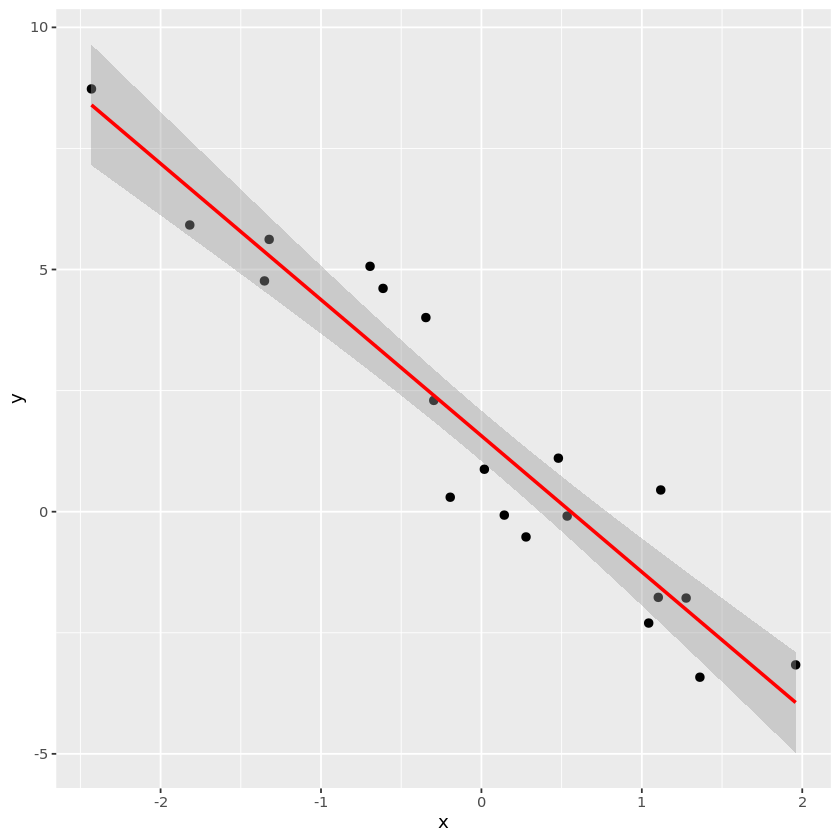

In [9]:
gg +
geom_point(aes(x=x,y=y),size=2) +
geom_smooth(method='lm',colour='red')

**Aplicamos el método de descenso en gradiente para comparar con lo calculado vía `lm`**

Recordamos que el problema de optimización es: $$\displaystyle \min_{\beta \in \mathbb{R}^n} \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

**Función objetivo:**

In [10]:
cte <- sum(y*y)

In [11]:
A <- matrix(c(rep(1,mpoints),df$x),nrow=mpoints)

In [12]:
fo <-function(beta)1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))
#obsérvese que no se realiza el producto A^TA

**Punto inicial $\beta^{(0)}:$**

In [13]:
beta_0 <- matrix(c(0,0),nrow=2)

In [14]:
beta_ast <- c(linear_model$coefficients[1],linear_model$coefficients[2])


**$\beta^*$ (punto óptimo)**:

In [15]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


**$p^*$ (valor óptimo)**:

In [16]:
p_ast <- fo(beta_ast)

In [17]:
p_ast

[1] 11.1175

**argumentos para el método de descenso en gradiente:**

In [18]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30


In [19]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normagf		Error x_ast	Error p_ast	line search
1	7.73e+01	1.00e+00	1.11e+01	---
2	4.17e+01	5.17e-01	3.11e+00	6.25e-02
3	2.41e+01	2.95e-01	1.03e+00	6.25e-02
4	1.41e+01	1.73e-01	3.52e-01	6.25e-02
5	8.27e+00	1.01e-01	1.21e-01	6.25e-02
6	4.86e+00	5.95e-02	4.18e-02	6.25e-02
7	2.85e+00	3.49e-02	1.44e-02	6.25e-02
8	1.68e+00	2.05e-02	4.97e-03	6.25e-02
9	9.84e-01	1.20e-02	1.72e-03	6.25e-02
10	5.78e-01	7.07e-03	5.92e-04	6.25e-02
11	3.39e-01	4.15e-03	2.04e-04	6.25e-02
12	1.99e-01	2.44e-03	7.04e-05	6.25e-02
13	1.17e-01	1.43e-03	2.43e-05	6.25e-02
14	6.88e-02	8.42e-04	8.38e-06	6.25e-02
15	4.04e-02	4.94e-04	2.89e-06	6.25e-02
16	2.37e-02	2.90e-04	9.96e-07	6.25e-02
17	1.39e-02	1.70e-04	3.43e-07	6.25e-02
18	8.19e-03	1.00e-04	1.19e-07	6.25e-02
19	4.81e-03	5.89e-05	4.10e-08	6.25e-02
20	2.82e-03	3.46e-05	1.41e-08	6.25e-02
21	1.65e-03	2.03e-05	4.87e-09	6.25e-02
22	9.67e-04	1.18e-05	1.66e-09	6.25e-02
23	5.69e-04	6.95e-06	5.71e-10	6.25e-02
24	3.34e-04	4.11e-06	1.99e-10	6.25e-02
25	1.95e-04	2.39e-06	6.76e-11	6

**Soluciones que están en la lista `l`:**

In [20]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de descenso en gradiente:**

In [21]:
print(beta)

          [,1]
[1,]  1.565663
[2,] -2.810581


**$\beta^*$:**

In [22]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


**Error relativo:**

In [23]:
compute_error(beta_ast, beta)

[1] 2.618474e-07

**Tenemos alrededor de $7$ dígitos de precisión.**

**Secuencia de minimización $\beta^{(k)}$**:

In [24]:
beta_plot

0,1.914276,1.503255,1.566829,1.573826,1.558663,1.570324,1.562788,1.567386,1.564643,⋯,1.565658,1.565666,1.565661,1.565664,1.565662,1.565663,1.565663,1.565663,1.565663,1.565663
0,-4.435513,-1.862656,-3.365714,-2.484941,-3.001737,-2.698338,-2.876499,-2.771869,-2.833318,⋯,-2.810693,-2.810517,-2.810620,-2.810560,-2.810595,-2.810574,-2.810586,-2.810579,-2.810584,-2.810581


In [25]:
total_of_iterations

[1] 29

**Gráfica de error relativo:**

In [26]:
gg <- ggplot()

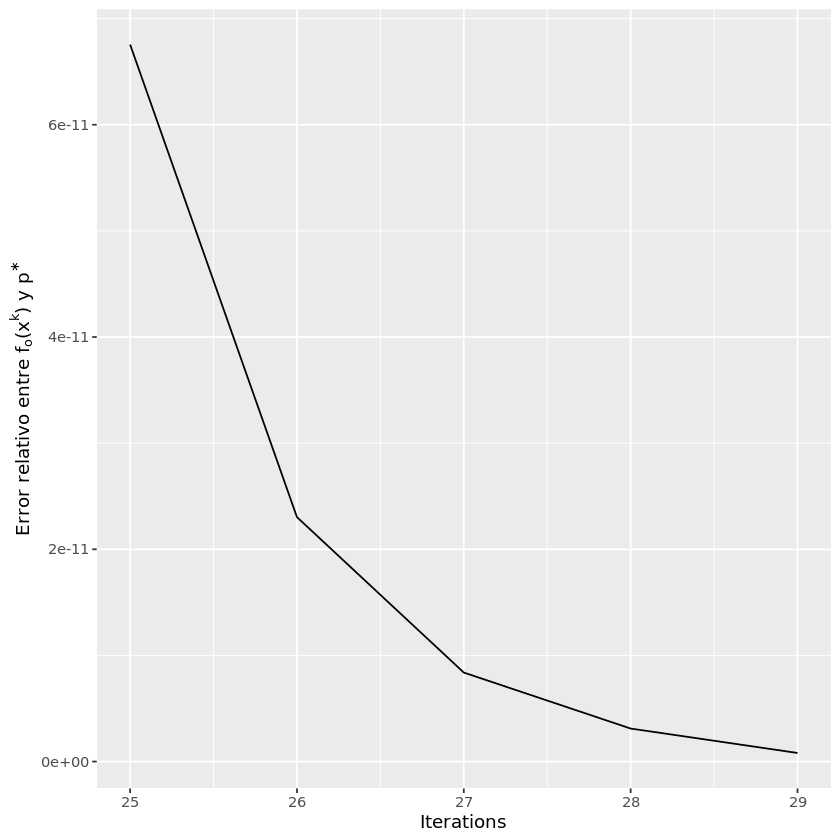

In [27]:
gg +
geom_line(aes(x=25:total_of_iterations,y=Err_plot[25:length(Err_plot)])) + 
xlab('Iterations') + ylab(TeX('Error relativo entre f_o(x^k) y p^*'))


## Ejemplos con regularización

En el paquete de R [glmnet package](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html) se tiene la función del mismo nombre [glmnet](https://www.rdocumentation.org/packages/glmnet/versions/3.0-2/topics/glmnet) en la que se ajustan [modelos lineales generalizados](https://en.wikipedia.org/wiki/Generalized_linear_model) con penalización *elastic net* (compromiso entre *lasso* y *ridge*). La **función objetivo** en el caso de regresión lineal (familia Gaussiana) utiliza una **pérdida cuadrática** con regularización *elastic net*:

$$\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \frac{1}{2m} \sum_{i=1}^m(y_i -\beta_0 - x_i^T\beta)^2  + \lambda \left (\frac{(1-\alpha)}{2}||\beta||^2_2 + \alpha ||\beta||_1 \right )$$

donde: $x_i \in \mathbb{R}^n$. 

Véase el artículo [Regularization Paths for Generalized Linear Models via Coordinate Descent](https://web.stanford.edu/~hastie/Papers/glmnet.pdf) para esta formulación. 

**Obsérvese que no** se penaliza la variable $\beta_0$.

**Comentarios:**

* **Lo que continúa en la nota son comparaciones entre lo obtenido por el paquete de `glmnet` de R vs implementaciones simples de los métodos de descenso por coordenadas y Newton realizadas por el prof. La implementación realizada en el paquete es mucho más general y eficiente que lo realizado por el prof. No se pretende realizar comparaciones en tiempo, memoria ni generalidad en la solución de problemas. Aún así, lo presentado a continuación ayuda a entender el problema que se resuelve y la metodología utilizada.**

* También en los ejemplos **no se realizará estandarización de variables (aunque es recomendable realizar esto para ejemplos reales...).**

## Regularización lasso vía método de Newton

**En este segundo ejemplo utilizamos la regularización *lasso***.

Obsérvese que para este caso la función objetivo en `glmnet` es de la forma:

$$\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \frac{1}{2m} \sum_{i=1}^m(y_i -\beta_0 - x_i^T\beta)^2  + \lambda \alpha ||\beta||_1$$

**Comentario:** recuérdese que $||\beta||_1 = \displaystyle \sum_{i=1}^n |\beta_i|$ por lo que la función objetivo continúa siendo convexa pero no es diferenciable en el vector $\beta = 0$ (el valor absoluto es una función no diferenciable en el punto $0$).

### Ejemplo

Simulamos algunos datos:

**Obs:** se utilizarán los siguientes argumentos para la función de R:

In [28]:
reg<-.5 #este es lambda * alpha, el parámetro de regularización
        #en la formulación de glmnet

In [29]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,thresh=1e-8)

In [30]:
beta_ast <- as.matrix(fit$beta)


**$\beta^*$:**

In [31]:
print(beta_ast)

          s0
V1  0.000000
V2 -2.416619


**Obsérvese** que $\beta^*_0$ es $0$ y por tanto se puede eliminar el intercepto del modelo. 

**Comentario:** **A continuación se elimina la primera columna de la matriz $A$** por la observación anterior. La primer columna de $A$ (columna de $1$s) implica considerar un modelo con intercepto: $\beta_0$. Además como se mencionó anteriormente, la implementación en `glmnet` para el caso de *lasso* es más general y tiende a hacer $0$s los coeficientes estimados. La implementación del prof **no está realizando esto** (pues el objetivo es mostrar el uso de métodos de descenso para resolver diferentes problemas, el objetivo no es obtener los mismos resultados que `glmnet`) por lo que los coeficientes que son $0$ no serán estimados correctamente en esta implementación.

In [32]:
print(head(A))

     [,1]       [,2]
[1,]    1  1.1025783
[2,]    1  1.1178965
[3,]    1 -1.8181019
[4,]    1 -0.1944140
[5,]    1 -0.6131956
[6,]    1 -0.3462673


Eliminamos la primer columna de $A$ que ayuda a la estimación del intercepto:

In [33]:
A<-A[,-1]

In [34]:
print(head(A))

[1]  1.1025783  1.1178965 -1.8181019 -0.1944140 -0.6131956 -0.3462673


**El objetivo entonces es estimar una sola $\beta$: $\beta_1$.**

In [35]:
beta_ast<-beta_ast[2]

In [36]:
print(beta_ast)

[1] -2.416619


Usaremos el método de **descenso por coordenadas** y el método de Newton para aproximar a $\beta_1^*$. Ver [4.2.Descenso_por_coordenadas_R.ipynb](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Descenso_por_coordenadas_R.ipynb), [4.2.Metodo_de_Newton_Python](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Metodo_de_Newton_Python.ipynb). Además usaremos la siguiente función `quita_signo` que ayuda a aproximar la derivada de la función objetivo $f_o$ y así lidiar con la no diferenciabilidad en $0$.

La función `quita_signo` realiza:

$$\text{quita_signo}(x) = \begin{cases}
x & \text{si } x > 0,\\
-x & \text{si } x <0,\\
\approx 2.22 \times 10^{-308} & \text{si } |x| \approx 0
\end{cases}$$


**obsérvese que el valor elegido en el tercer caso es el más pequeño positivo normalizado en un sistema de punto flotante, ver [1.2.Sistema_de_punto_flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb).**

In [37]:
quita_signo<-function(beta){
    beta<-sign(beta)*beta
    #la siguiente variable es un índice que localiza aquellas entradas del
    #vector beta en valor absoluto que son cercanas a 0.
    ind <- beta < .Machine$double.xmin & beta > -.Machine$double.xmin 
    #se asigna a cada entrada localizada en ind el valor más pequeño normalizado
    #en un sistema de punto flotante
    beta[ind] <- .Machine$double.xmin 
    beta
    }

In [38]:
.Machine$double.xmin

[1] 2.225074e-308

**Comentario:** la definición de la función `quita_signo` se basa en lo que se conoce como *subdifferential* que es un conjunto de [subderivatives](https://en.wikipedia.org/wiki/Subderivative), útiles para generalizar las derivadas para funciones convexas que no son diferenciables en puntos de su dominio.

**Así, la función objetivo es:**

In [39]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(A*y)) + 
                              1/2*sum(beta*(A*(A*beta)))) + 
                              reg*sum(quita_signo(beta))

**Valor óptimo:**

In [40]:
p_ast <- fo(beta_ast)

In [41]:
p_ast

[1] 3.080822

**Punto inicial $\beta^{(0)}:$**

In [42]:
beta_0<-0

#### Solución vía descenso por coordenadas

**Argumentos para el método de descenso por coordenadas:**

In [43]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30


In [44]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normagf		Error x_ast	Error p_ast	line search
1	4.05e+00	1.00e+00	1.19e+00	---
2	4.79e-01	1.62e-01	2.93e-02	5.00e-01
3	1.29e-01	3.59e-02	2.08e-03	1.00e+00
4	3.47e-02	1.75e-02	1.08e-04	1.00e+00
5	9.36e-03	3.15e-03	3.50e-05	1.00e+00
6	2.52e-03	7.02e-03	4.54e-05	1.00e+00
7	6.79e-04	5.98e-03	4.62e-05	1.00e+00
8	1.83e-04	6.26e-03	4.62e-05	1.00e+00
9	4.92e-05	6.18e-03	4.62e-05	1.00e+00
10	1.32e-05	6.20e-03	4.62e-05	1.00e+00
11	3.51e-06	6.20e-03	4.62e-05	1.00e+00
12	8.88e-07	6.20e-03	4.62e-05	1.00e+00
13	2.22e-07	6.20e-03	4.62e-05	1.00e+00
14	8.88e-08	6.20e-03	4.62e-05	1.00e+00
15	0.00e+00	6.20e-03	4.62e-05	1.00e+00
Error of x with respect to x_ast: 6.20e-03
Approximate solution:[1] -2.401638


**Soluciones que están en la lista `l`:**

In [45]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de descenso por coordenadas:**

In [46]:
print(beta)

[1] -2.401638


**$\beta^*$:**

In [47]:
print(beta_ast)

[1] -2.416619


**Error relativo:**

In [48]:
compute_error(beta_ast, beta)

[1] 0.006199409

**Tenemos alrededor de $2$ dígitos de precisión**.

**Secuencia de minimización $\beta^{(k)}$**:

In [49]:
print(beta_plot)

 [1]  0.000000 -2.024205 -2.503282 -2.374264 -2.409010 -2.399653 -2.402172
 [8] -2.401494 -2.401677 -2.401627 -2.401641 -2.401637 -2.401638 -2.401638
[15] -2.401638


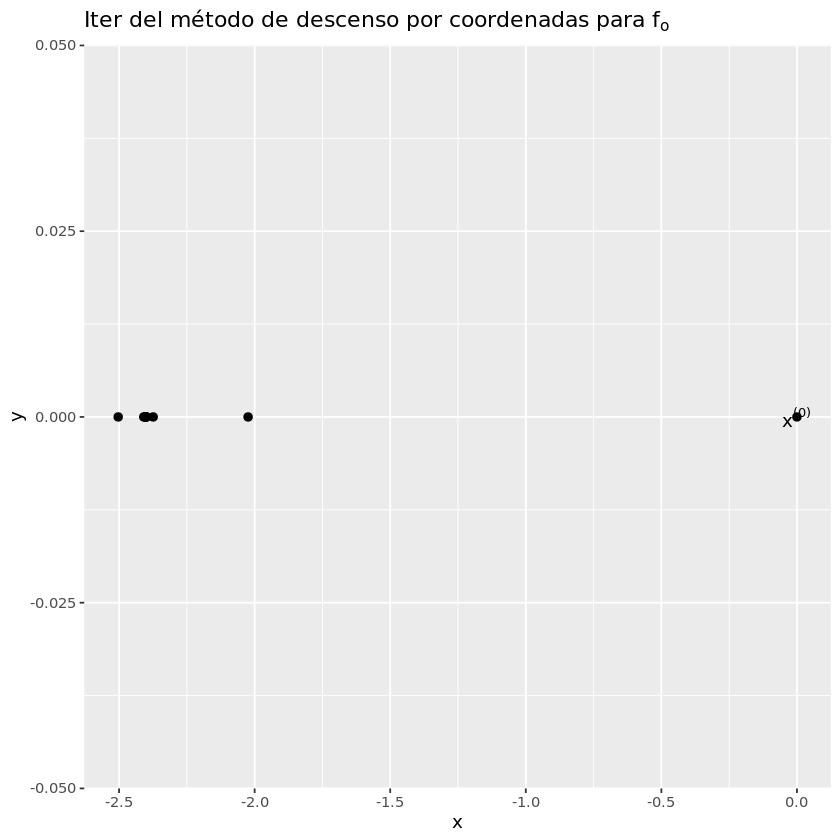

In [50]:
gg +
geom_point(aes(x=beta_plot,y=0),size=2) +
annotate(geom='text', x=0, y=0, 
         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso por coordenadas para $f_o$'))

#### Solución vía el método de Newton

In [51]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normgf	Newton Decrement	Error x_ast	Error p_ast	line search	condHf
1	4.05e+00	1.29e+01	1.00e+00	1.19e+00	---		1.00e+00
2	1.00e+00	7.92e-01	3.21e-01	1.29e-01	1.00e+00	1.00e+00
3	6.24e-04	3.07e-07	6.00e-03	4.62e-05	1.00e+00	1.00e+00
4	1.78e-07	2.48e-14	6.20e-03	4.62e-05	1.00e+00	1.00e+00
Error of x with respect to x_ast: 6.20e-03
Approximate solution:[1] -2.401638


**Soluciones que están en la lista `l`:**

In [52]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de Newton:**

In [53]:
print(beta)

[1] -2.401638


**$\beta^*$:**

In [54]:
print(beta_ast)

[1] -2.416619


**Error relativo:**

In [55]:
compute_error(beta_ast, beta)

[1] 0.00619936

**Tenemos alrededor de $2$ dígitos de precisión.**

**Secuencia de minimización $\beta^{(k)}$**:

In [56]:
print(beta_plot)

[1]  0.000000 -3.191950 -2.402130 -2.401638


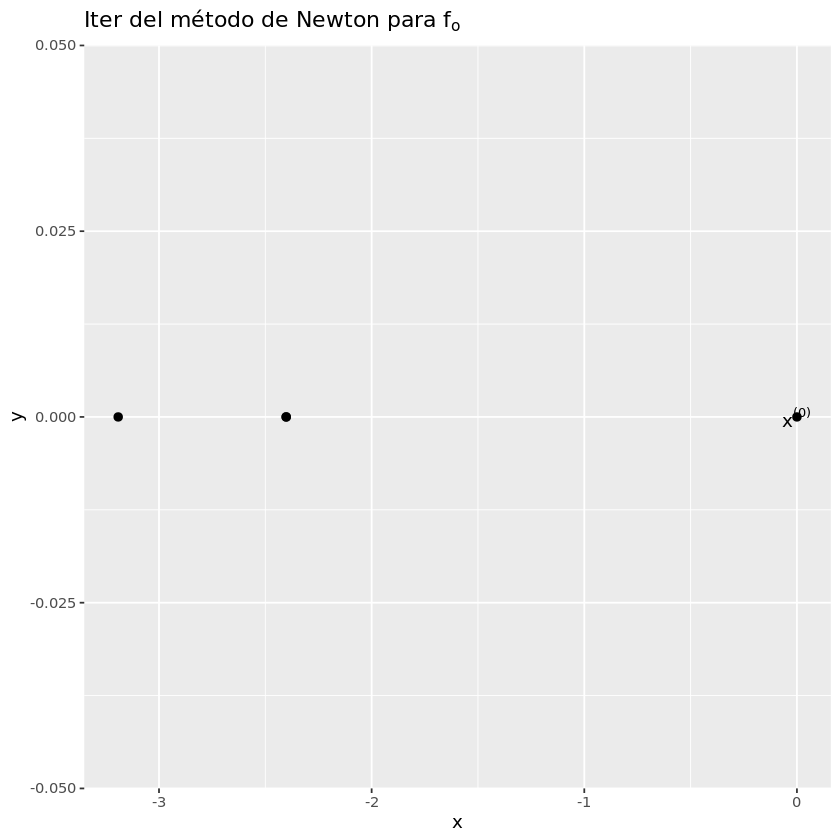

In [57]:
gg +
geom_point(aes(x=beta_plot,y=0),size=2) +
annotate(geom='text', x=0, y=0, 
         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de Newton para $f_o$'))

**Comentario:** En ambos métodos se aproxima de forma correcta a $\beta_1^*$. 

### Otro ejemplo: modelo sin intercepto

Simulamos otros datos:

In [58]:
set.seed(1989) #para reproducibilidad
mpoints <- 50
x1 <- rnorm(mpoints)
x2 <- rnorm(mpoints,2,1)
y <- 3*x1 -.5*x2

In [59]:
A<-cbind(x1,x2)

In [60]:
print(head(A))

             x1       x2
[1,]  1.1025783 2.073898
[2,]  1.1178965 1.416466
[3,] -1.8181019 1.415609
[4,] -0.1944140 2.798076
[5,] -0.6131956 3.432278
[6,] -0.3462673 1.543721


In [61]:
print(head(y))

[1]  2.270786  2.645456 -6.162110 -1.982280 -3.555726 -1.810662


**Reconstruímos a la función objetivo con el nuevo valor de la constante y el número de puntos:**

In [62]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [63]:
cte

[1] 633.8818

In [64]:
mpoints

[1] 50

In [65]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 
                              1/2*sum(beta*(t(A)%*%(A%*%beta)))) + 
                              reg*sum(quita_signo(beta))


**Solución vía `glmnet` sin intercepto:**

In [66]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [67]:
beta_ast <- as.matrix(fit$beta)


In [68]:
print(beta_ast)

           s0
x1  2.6122015
x2 -0.3794804


**Solución vía método de Newton:**

In [69]:
beta_0<-c(1,1)

In [70]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [71]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normgf	Newton Decrement	Error x_ast	Error p_ast	line search	condHf
1	7.19e+00	1.44e+01	8.04e-01	4.13e+00	---		3.32e+00
2	1.00e+00	2.31e-01	8.74e-02	7.11e-02	1.00e+00	3.32e+00
3	4.75e-04	1.70e-07	1.36e-04	5.23e-08	1.00e+00	3.32e+00
4	2.22e-08	1.14e-16	5.90e-08	1.05e-14	1.00e+00	3.34e+00
Error of x with respect to x_ast: 5.90e-08
Approximate solution:[1]  2.6122013 -0.3794804


In [72]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de Newton:**

In [73]:
print(beta)

[1]  2.6122013 -0.3794804


**$\beta^*$:**

In [74]:
print(beta_ast)

           s0
x1  2.6122015
x2 -0.3794804


**Error relativo:**

In [75]:
compute_error(beta_ast, beta)

[1] 5.903416e-08

### Otro ejemplo: dataset [mtcars](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars) de R

In [76]:
print(head(mtcars))

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


**Utilizamos las variables numéricas `disp` y `drat`:**

In [77]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [78]:
A<-X[,c(2,4)]

In [79]:
print(head(A))

                  disp drat
Mazda RX4          160 3.90
Mazda RX4 Wag      160 3.90
Datsun 710         108 3.85
Hornet 4 Drive     258 3.08
Hornet Sportabout  360 3.15
Valiant            225 2.76


**Ajuste vía `glmnet`:**

In [80]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [81]:
beta_ast <- as.matrix(fit$beta)


**$\beta^*$**:

In [82]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


**Solución vía método de Newton**

**Reconstruímos a la función objetivo con el nuevo valor de la constante y el número de puntos:**

In [83]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [84]:
cte

[1] 14042.31

In [85]:
mpoints

[1] 32

In [86]:
beta_0<-c(1,1)

In [87]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [88]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normgf	Newton Decrement	Error x_ast	Error p_ast	line search	condHf
1	6.49e+04	6.18e+04	8.62e-01	3.17e+03	---		1.32e+04
2	4.89e+01	3.15e+02	1.28e+00	1.53e+01	1.00e+00	1.64e+04
3	1.42e+00	3.62e-01	4.42e-02	1.82e-02	1.00e+00	1.66e+04
4	2.95e-02	1.43e-04	8.68e-04	7.37e-06	1.00e+00	1.62e+04
5	3.69e-04	9.53e-09	1.65e-05	7.02e-09	1.00e+00	1.57e+04
Error of x with respect to x_ast: 1.65e-05
Approximate solution:[1] -0.01682385  6.59064139


In [89]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de Newton:**

In [90]:
print(beta)

[1] -0.01682385  6.59064139


**$\beta^*$**:

In [91]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


**Error relativo:**

In [92]:
compute_error(beta_ast, beta)

[1] 1.647e-05

**Tenemos alrededor de $5$ dígitos de precisión.**

### Probamos cambiar el parámetro de regularización

In [93]:
reg<-0.2

**Ajuste vía `glmnet`:**

In [94]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

**$\beta^*:$**

In [95]:
beta_ast <- as.matrix(fit$beta)


In [96]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


**Solución vía método de Newton:**

In [97]:
beta_0<-c(1,1)

In [98]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [99]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normgf	Newton Decrement	Error x_ast	Error p_ast	line search	condHf
1	6.49e+04	6.16e+04	8.64e-01	3.98e+03	---		4.20e+04
2	9.82e+01	1.19e+03	2.54e+00	7.77e+01	1.00e+00	1.60e+04
3	2.51e+00	2.55e-01	3.73e-02	1.66e-02	1.00e+00	1.60e+04
4	1.66e-02	5.67e-05	5.24e-04	3.56e-06	1.00e+00	1.66e+04
5	5.20e-04	1.93e-08	3.37e-05	8.35e-09	1.00e+00	1.59e+04
Error of x with respect to x_ast: 3.37e-05
Approximate solution:[1] -0.01766474  6.66329488


In [100]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de Newton:**

In [101]:
print(beta)

[1] -0.01766474  6.66329488


**$\beta^*:$**

In [102]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


**Error relativo:**

In [103]:
compute_error(beta_ast, beta)

[1] 3.370467e-05

**Tenemos alrededor de $5$ dígitos de precisión.**

**Solución vía descenso por coordenadas:**

In [104]:
beta_0<-c(0,0)

In [105]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normagf		Error x_ast	Error p_ast	line search
1	4.02e+03	1.00e+00	2.72e+01	---
2	1.60e+02	1.00e+00	1.20e+01	1.53e-05
3	2.86e+01	1.00e+00	1.19e+01	1.53e-05
4	2.73e+03	4.76e-01	9.75e+00	1.25e-01
5	1.08e+02	4.76e-01	2.71e+00	1.53e-05
6	1.39e+01	4.76e-01	2.70e+00	1.53e-05
7	1.30e+03	2.28e-01	2.21e+00	1.25e-01
8	5.20e+01	2.28e-01	6.21e-01	1.53e-05
9	6.64e+00	2.28e-01	6.19e-01	1.53e-05
10	6.22e+02	1.09e-01	5.07e-01	1.25e-01
11	2.47e+01	1.09e-01	1.43e-01	1.53e-05
12	3.18e+00	1.09e-01	1.42e-01	1.53e-05
13	2.98e+02	5.22e-02	1.16e-01	1.25e-01
14	1.18e+01	5.22e-02	3.27e-02	1.53e-05
15	1.52e+00	5.22e-02	3.26e-02	1.53e-05
16	1.43e+02	2.50e-02	2.67e-02	1.25e-01
17	5.66e+00	2.50e-02	7.50e-03	1.53e-05
18	7.29e-01	2.50e-02	7.47e-03	1.53e-05
19	6.84e+01	1.20e-02	6.12e-03	1.25e-01
20	2.71e+00	1.20e-02	1.72e-03	1.53e-05
21	3.49e-01	1.20e-02	1.71e-03	1.53e-05
22	3.27e+01	5.72e-03	1.40e-03	1.25e-01
23	1.30e+00	5.72e-03	3.95e-04	1.53e-05
24	1.67e-01	5.72e-03	3.93e-04	1.53e-05
25	1.57e+01	2.73e-03	3.22e-04	1

In [106]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de descenso por coordenadas:**

In [107]:
print(beta)

[1] -0.01756723  6.65444873


**$\beta^*:$**

In [108]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


**Error relativo:**

In [109]:
compute_error(beta_ast, beta)

[1] 0.001294012

**Tenemos alrededor de $2$ dígitos de precisión.**

**Secuencia de minimización:**

In [110]:
beta_plot

0,0.06136831,0.05895485,0.05895485,0.01724231,0.01888275,0.01888275,-0.0009476207,-0.0001616408,-0.0001616408,⋯,-0.01678366,-0.01674264,-0.01674264,-0.01724231,-0.01722266,-0.01722266,-0.01746201,-0.0174526,-0.0174526,-0.01756723
0,0.00000000,0.00000000,3.49381608,3.49381608,3.49381608,5.14563299,5.1456329864,5.1456329864,5.9362877280,⋯,6.58333947,6.58333947,6.62496245,6.62496245,6.62496245,6.64489965,6.64489965,6.6448997,6.6544487,6.65444873


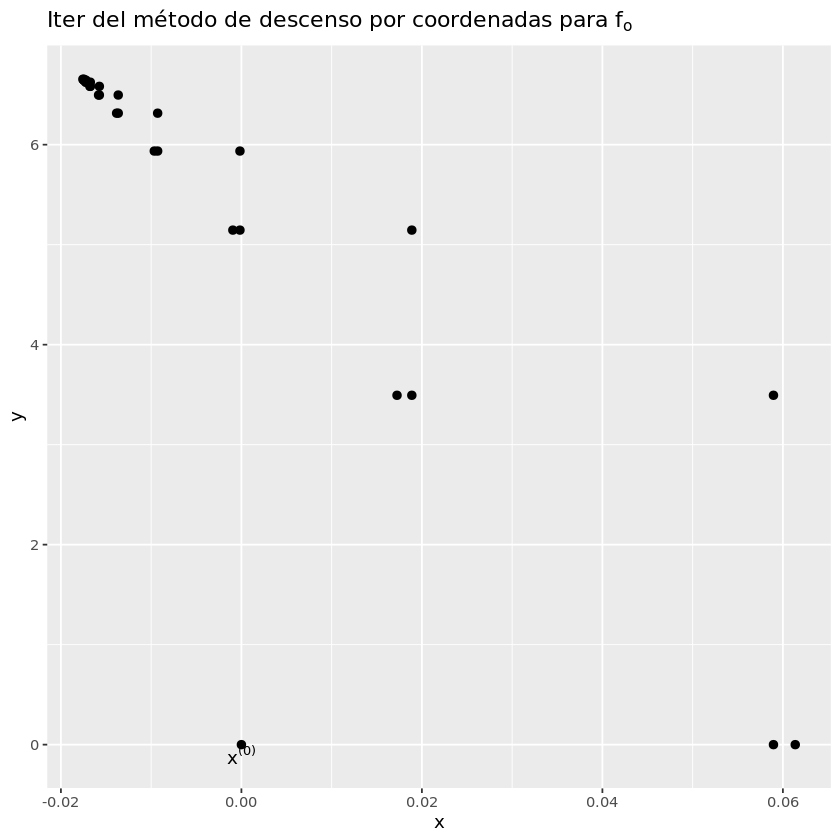

In [111]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
annotate(geom='text', x=0, y=-0.1, 
         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso por coordenadas para $f_o$'))

#### Comparación con descenso en gradiente

In [112]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normagf		Error x_ast	Error p_ast	line search
1	4.02e+03	1.00e+00	2.72e+01	---
2	1.61e+02	1.00e+00	1.20e+01	1.53e-05
3	2.86e+01	1.00e+00	1.19e+01	1.53e-05
4	2.04e+02	9.98e-01	1.19e+01	4.88e-04
5	2.89e+01	9.98e-01	1.19e+01	1.53e-05
6	1.28e+02	9.97e-01	1.19e+01	2.44e-04
7	2.82e+01	9.97e-01	1.19e+01	1.53e-05
8	1.61e+02	9.95e-01	1.18e+01	4.88e-04
9	2.84e+01	9.95e-01	1.18e+01	1.53e-05
10	2.04e+02	9.93e-01	1.18e+01	4.88e-04
11	2.88e+01	9.92e-01	1.18e+01	1.53e-05
12	1.28e+02	9.91e-01	1.17e+01	2.44e-04
13	2.81e+01	9.91e-01	1.17e+01	1.53e-05
14	1.61e+02	9.89e-01	1.17e+01	4.88e-04
15	2.83e+01	9.89e-01	1.17e+01	1.53e-05
16	2.04e+02	9.87e-01	1.17e+01	4.88e-04
17	2.87e+01	9.87e-01	1.16e+01	1.53e-05
18	1.28e+02	9.86e-01	1.16e+01	2.44e-04
19	2.79e+01	9.86e-01	1.16e+01	1.53e-05
20	1.61e+02	9.84e-01	1.16e+01	4.88e-04
21	2.81e+01	9.84e-01	1.16e+01	1.53e-05
22	2.04e+02	9.82e-01	1.15e+01	4.88e-04
23	2.85e+01	9.82e-01	1.15e+01	1.53e-05
24	1.28e+02	9.81e-01	1.15e+01	2.44e-04
25	2.78e+01	9.81e-01	1.15e+01	1

In [113]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de descenso en gradiente:**

In [114]:
print(beta)

[1] 0.05714807 0.15508541


**$\beta^*:$**

In [115]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


**Error relativo:**

In [116]:
compute_error(beta_ast,beta)

[1] 0.9767857

**Tenemos un error del $97\%$!**.

In [117]:
beta_plot

0,0.061368308,0.058941308,0.06184346,0.05875461,0.06062378,0.05871641,0.06096286,0.05853562,0.06143894,⋯,0.06015838,0.05773067,0.06063629,0.05754652,0.05941755,0.05750965,0.05975933,0.05733139,0.06023815,0.05714807
0,0.001131953,0.001529336,0.01517238,0.01556124,0.02237325,0.02277526,0.03636735,0.03676248,0.05033357,⋯,0.10628015,0.10667081,0.12009913,0.12048129,0.12718616,0.12758147,0.14095952,0.14134797,0.15470547,0.15508541


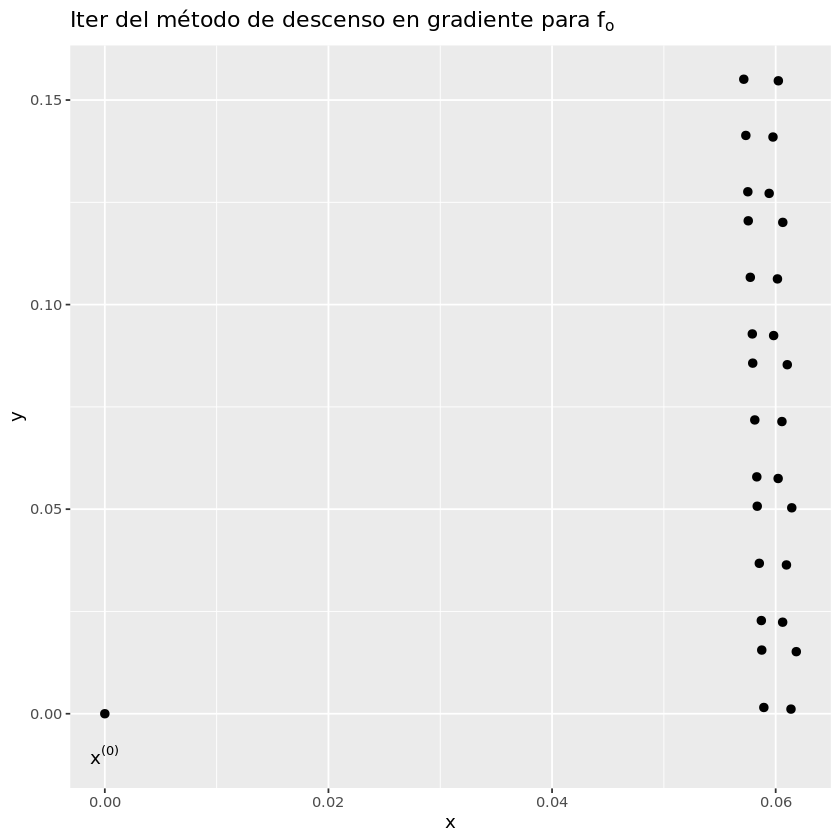

In [118]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
annotate(geom='text', x=0, y=-0.01, 
         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

###  Otro ejemplo: aumentamos número de columnas para el mismo dataset de [mtcars](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars) de R


In [119]:
A<-X[,c(2,4,5,6)]

In [120]:
print(head(A))

                  disp drat    wt  qsec
Mazda RX4          160 3.90 2.620 16.46
Mazda RX4 Wag      160 3.90 2.875 17.02
Datsun 710         108 3.85 2.320 18.61
Hornet 4 Drive     258 3.08 3.215 19.44
Hornet Sportabout  360 3.15 3.440 17.02
Valiant            225 2.76 3.460 20.22


**Solución vía `glmnet`:**

In [121]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

**$\beta^*$**:

In [122]:
beta_ast <- as.matrix(fit$beta)


In [123]:
print(beta_ast)

                s0
disp  0.0006973293
drat  2.6120443627
wt   -3.6222009972
qsec  1.2403485581


**Solución vía método de Newton:**

In [124]:
beta_0<-c(1,1,1,1)

In [125]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


**Newtons method**

In [126]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I	Normgf	Newton Decrement	Error x_ast	Error p_ast	line search	condHf
1	6.99e+04	7.14e+04	1.08e+00	7.77e+03	---		3.58e+04
2	1.62e+01	1.66e+01	1.41e+00	1.52e+00	1.00e+00	4.71e+05
3	1.58e+00	4.78e+00	1.00e+00	4.54e-01	1.00e+00	5.34e+05
4	3.38e-01	3.11e-01	1.89e-01	2.89e-02	1.00e+00	3.24e+05
5	3.03e-01	9.68e-03	3.61e-02	9.22e-04	1.00e+00	7.76e+05
6	2.92e-02	1.34e-04	5.76e-03	1.51e-05	1.00e+00	5.27e+05
7	5.44e-03	4.01e-05	7.19e-04	2.34e-06	1.00e+00	3.14e+05
8	2.18e-03	8.46e-05	1.62e-03	3.57e-06	1.00e+00	3.32e+06
9	3.01e-03	8.49e-07	3.30e-03	4.70e-06	1.25e-01	4.48e+05
10	1.01e-04	-1.91e-09	3.43e-03	4.78e-06	1.00e+00	1.97e+06
Error of x with respect to x_ast: 3.43e-03
Approximate solution:[1]  0.0006261966  2.6223707978 -3.6105443552  1.2371047935


In [127]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de Newton:**

In [128]:
print(beta)

[1]  0.0006261966  2.6223707978 -3.6105443552  1.2371047935


**$\beta^*$:**

In [129]:
print(beta_ast)

                s0
disp  0.0006973293
drat  2.6120443627
wt   -3.6222009972
qsec  1.2403485581


**Error relativo:**

In [130]:
compute_error(beta_ast, beta)

[1] 0.00343211

**Tenemos alrededor de $3$ dígitos de precisión.**

**Secuencia de minimización:**

In [131]:
beta_plot

1,-0.05606289,-0.01851005,-0.003576263,0.0009944162,0.0005168405,0.0007160974,0.0006791189,0.0006377508,0.0006261966
1,-0.12200766,5.97538040,1.869463441,2.7751959837,2.6038033655,2.6095959668,2.6183362938,2.6231848830,2.6223707978
1,2.31423223,-0.55655647,-3.169499864,-3.6324961838,-3.5968211157,-3.6243745447,-3.6184323138,-3.6122536944,-3.6105443552
1,1.48267081,0.26564075,1.362212247,1.2057895393,1.2396914838,1.2409809623,1.2386540494,1.2371100579,1.2371047935


## Regularización ridge vía SVD

Función objetivo en `glmnet`:

$$\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \frac{1}{2m} \sum_{i=1}^m(y_i -\beta_0 - x_i^T\beta)^2  + \lambda \left (\frac{(1-\alpha)}{2}||\beta||^2_2 + \alpha ||\beta||_1 \right )$$

Obsérvese que para este caso la función objetivo en `glmnet` es de la forma ($\alpha=0$):

$$\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \frac{1}{2m} \sum_{i=1}^m(y_i -\beta_0 - x_i^T\beta)^2  + \frac{\lambda}{2} ||\beta||^2_2$$

**Comentarios:** 


* A diferencia del caso de *lasso*, la función objetivo para la regularización *ridge* sí es diferenciable en cualquier punto de su dominio. Recuérdese que $||\beta||^2_2 = \displaystyle \sum_{i=1}^n \beta_i^2$ y por tanto la función objetivo continúa siendo convexa.

* También en este caso a diferencia de *lasso* la solución está dada por la expresión vía la **descomposición en valores singulares de la matriz** $A$, ver [3.3.d.SVD.ipynb](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.d.SVD.ipynb):


$$
\begin{eqnarray}
\beta^* &=& (A^TA + \lambda I)^{-1} A^Ty \nonumber \\
&=& (V (\Sigma^{T})^2 V^T + \lambda I)^{-1} V \Sigma^TU^Ty \nonumber \\
&=& V((\Sigma^{T})^2 + \lambda I)^{-1} V^T V \Sigma^T U^Ty \nonumber \\
&=& V D U^Ty \nonumber
\end{eqnarray}
$$

donde: $D$ es una matriz diagonal con entradas $\frac{\sigma_i}{\sigma_i^2 + \lambda}$ para $i=1,\dots , n$.


* Por la forma de la matriz del sistema de ecuaciones lineales: $A^TA + \lambda I$ aplicar el método de descenso por dirección de Newton equivale a resolver tal sistema con métodos o algoritmos para sistemas de ecuaciones lineales como los revisados en [3.3.Solucion_de_SEL_y_FM](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.Solucion_de_SEL_y_FM.ipynb). Por esta razón se elige a la SVD como método para resolver el problema de mínimos cuadrados lineales con regularización *ridge*.

Usamos el siguiente parámetro de regularización:

In [132]:
reg<-.5 #este es lambda, el parámetro de regularización
        #en la formulación de glmnet

### En un primer ejemplo utilizamos las variables numéricas `disp` y `drat`

In [133]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [134]:
A<-X[,c(2,4)]

In [135]:
print(head(A))

                  disp drat
Mazda RX4          160 3.90
Mazda RX4 Wag      160 3.90
Datsun 710         108 3.85
Hornet 4 Drive     258 3.08
Hornet Sportabout  360 3.15
Valiant            225 2.76


**Solución vía `glmnet`:**

In [136]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [137]:
beta_ast <- as.matrix(fit$beta)


**$\beta^*:$**

In [138]:
print(beta_ast)

              s0
disp -0.01669418
drat  6.57883316


**Solución vía SVD:**

In [139]:
#svd of A
singular_value_decomposition <- svd(A)
s <- singular_value_decomposition$d
u <- singular_value_decomposition$u
v <- singular_value_decomposition$v

cte_svd <- s/(s^2+reg)*(t(u)%*%y)

In [140]:
beta_ridge <- v%*%cte_svd

In [141]:
print(beta_ridge)

             mpg
[1,] -0.01793611
[2,]  6.68661032


In [142]:
compute_error(beta_ast,beta_ridge)

[1] 0.01638345

**Tenemos aproximadamente dos dígitos de precisión.**

### Añadimos más columnas

In [143]:
A<-X[,c(2,4,5,6)]

In [144]:
print(head(A))

                  disp drat    wt  qsec
Mazda RX4          160 3.90 2.620 16.46
Mazda RX4 Wag      160 3.90 2.875 17.02
Datsun 710         108 3.85 2.320 18.61
Hornet 4 Drive     258 3.08 3.215 19.44
Hornet Sportabout  360 3.15 3.440 17.02
Valiant            225 2.76 3.460 20.22


**Solución vía `glmnet`:**

In [145]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [146]:
beta_ast <- as.matrix(fit$beta)


**$\beta^*$:**

In [147]:
print(beta_ast)

               s0
disp -0.002266897
drat  2.574343046
wt   -3.235364158
qsec  1.216575201


**Solución vía SVD:**

In [148]:
#svd of A
singular_value_decomposition <- svd(A)
s <- singular_value_decomposition$d
u <- singular_value_decomposition$u
v <- singular_value_decomposition$v

cte_svd <- s/(s^2+reg)*(t(u)%*%y)

In [149]:
beta_ridge <- v%*%cte_svd

In [150]:
print(beta_ridge)

              mpg
[1,]  0.007263538
[2,]  2.819440010
[3,] -4.490056911
[4,]  1.271431770


**Error relativo:**

In [151]:
compute_error(beta_ast,beta_ridge)

[1] 0.2969052

**Tenemos $29\%$ de error**. La razón de la mala estimación es debido al **mal condicionamiento** de la matriz $A^TA$:

In [152]:
kappa(t(A)%*%A,exact=TRUE)

[1] 503037.7

El mal condicionamiento de $A$ en Estadística lo relacionan con problemas de multicolinealidad, véase [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity):

In [153]:
cor(A)

,disp,drat,wt,qsec
disp,1.0000000,-0.71021393,0.8879799,-0.43369788
drat,-0.7102139,1.00000000,-0.7124406,0.09120476
wt,0.8879799,-0.71244065,1.0000000,-0.17471588
qsec,-0.4336979,0.09120476,-0.1747159,1.00000000


Entonces tenemos alta correlación entre la variable `disp` y `wt`.

### Seleccionamos otras columnas de $A$ de modo que el número de condición de $A^TA$ no sea como el ejemplo anterior

In [154]:
A<-X[,c(4,5,6)]

In [155]:
kappa(t(A)%*%A, exact=TRUE)

[1] 1153.292

In [156]:
cor(A)

,drat,wt,qsec
drat,1.00000000,-0.7124406,0.09120476
wt,-0.71244065,1.0000000,-0.17471588
qsec,0.09120476,-0.1747159,1.00000000


**Solución vía `glmnet`:**

In [157]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [158]:
beta_ast <- as.matrix(fit$beta)


**$\beta^*$:**

In [159]:
print(beta_ast)

            s0
drat  2.568637
wt   -3.478654
qsec  1.232553


**Solución vía SVD:**

In [160]:
#svd of A
singular_value_decomposition <- svd(A)
s <- singular_value_decomposition$d
u <- singular_value_decomposition$u
v <- singular_value_decomposition$v

cte_svd <- s/(s^2+reg)*(t(u)%*%y)

In [161]:
beta_ridge <- v%*%cte_svd

In [162]:
print(beta_ridge)

           mpg
[1,]  2.892362
[2,] -3.643442
[3,]  1.197395


**Error relativo:**

In [163]:
compute_error(beta_ast,beta_ridge)

[1] 0.08116398

**Tenemos alrededor de $2$ dígitos de precisión**.

**Referencias:**


* [Regularization Paths for Generalized Linear Models via Coordinate Descent](https://web.stanford.edu/~hastie/Papers/glmnet.pdf)

* Ver [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb) para una introducción al problema de mínimos cuadrados con ejemplos en Python3.
